# Data Preprocessing

## I. Importing Essential Libraries

In [1]:
# core libraries
import os
import numpy as np
import pandas as pd

# image and visualizations
from PIL import Image
import matplotlib.pyplot as plt

# keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

Using TensorFlow backend.


## II. Load Sample Image

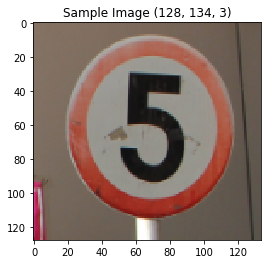

In [2]:
# load sample
data_path = "../data/train/00/000_1_0001.png"
img = Image.open(data_path)
img_arr = np.array(img)

# plot sample image
plt.title("Sample Image {}".format(img_arr.shape))
plt.imshow(img_arr)
plt.show()

## III. Generate Batches

In [7]:
# define paths
train_path = "../data/train"
test_path = "../data/test"

# get labels
labels = os.listdir(train_path)
labels.remove(".DS_Store")
labels.sort()

# generate batches
batch_generator = ImageDataGenerator(rescale=1./255)
train_batches = batch_generator.flow_from_directory(train_path, target_size = (227, 227), classes = labels)
test_batches = batch_generator.flow_from_directory(test_apth, target_size = (227, 227), classes = labels)

Found 4170 images belonging to 58 classes.


NameError: name 'test_apth' is not defined

## IV. Define Model Architecture

In [4]:
# define model
alex_net = Sequential()

# layer 1
alex_net.add(Conv2D(96, kernel_size = (11, 11), strides = 4, padding = "valid", input_shape = (227, 227, 3)))
alex_net.add(Activation("relu"))
alex_net.add(MaxPooling2D(pool_size = (3, 3), strides = 2))

# layer 2
alex_net.add(Conv2D(256, kernel_size = (5, 5), strides = 1, padding = "same"))
alex_net.add(Activation("relu"))
alex_net.add(MaxPooling2D(pool_size = (3, 3), strides = 2))

# layer 3
alex_net.add(Conv2D(384, kernel_size = (3, 3), strides = 1, padding = "same"))
alex_net.add(Activation("relu"))

# layer 4
alex_net.add(Conv2D(384, kernel_size = (3, 3), strides = 1, padding = "same"))
alex_net.add(Activation("relu"))

# layer 5
alex_net.add(Conv2D(256, kernel_size = (3, 3), strides = 1, padding = "same"))
alex_net.add(Activation("relu"))
alex_net.add(MaxPooling2D(pool_size = (3, 3), strides = 2))
alex_net.add(Flatten())

# layer 6
alex_net.add(Dense(4096))
alex_net.add(Dropout(0.5))
alex_net.add(Activation("relu"))

# layer 7
alex_net.add(Dense(4096))
alex_net.add(Dropout(0.5))
alex_net.add(Activation("relu"))

# layer 8
alex_net.add(Dense(58))
alex_net.add(Activation("softmax"))

## V. Compile and Train Model

In [5]:
# compile model
alex_net.compile(optimizer = Adam(lr = 0.001), loss = categorical_crossentropy)

In [6]:
# fit model
alex_net.fit_generator(train_batches, epochs = 5)

Epoch 1/5
131/131 [==============================] - 210s 2s/step - loss: 3.9742
Epoch 2/5
131/131 [==============================] - 200s 2s/step - loss: 3.0571
Epoch 3/5
131/131 [==============================] - 204s 2s/step - loss: 2.4453
Epoch 4/5
131/131 [==============================] - 200s 2s/step - loss: 1.9447
Epoch 5/5
131/131 [==============================] - 211s 2s/step - loss: 0.8427


In [ ]:
alex_net.evaluate_generator(test_batches)